In [155]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [156]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6630,6631,15726960,O'Brien,741,France,Female,36,3,0.00,2,1,1,89804.83,0
9013,9014,15799468,Catchpole,591,France,Female,34,3,96127.27,1,0,0,30972.06,0
4556,4557,15796231,Nwankwo,681,France,Female,18,1,98894.39,1,1,1,9596.40,0
8239,8240,15753955,Lori,639,Spain,Male,34,7,149940.04,2,0,0,156648.81,0
5854,5855,15743570,Feng,481,France,Female,34,5,0.00,2,1,1,125253.46,0


In [157]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Dropping Unnecessary Features**

In [158]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [159]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Removing Outlier**

In [160]:
lower_limit = df.Balance.mean() - 2*df.Balance.std()
lower_limit

-48308.921116771904

In [161]:
upper_limit = df.Balance.mean() + 2*df.Balance.std()
upper_limit

201280.69969277192

In [162]:
df.shape

(10000, 11)

In [163]:
df1 = df[(df.Balance<upper_limit) & (df.Balance>lower_limit)]
df1.shape

(9970, 11)

In [164]:
lower_limit = df1.EstimatedSalary.mean() - 2*df1.EstimatedSalary.std()
lower_limit

-14971.718970745453

In [165]:
upper_limit = df1.EstimatedSalary.mean() + 2*df1.EstimatedSalary.std()
upper_limit

215104.57993764617

In [166]:
df1.Balance.min()

0.0

In [167]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [168]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [169]:
df1.shape

(9970, 11)

**Visualizing Data**

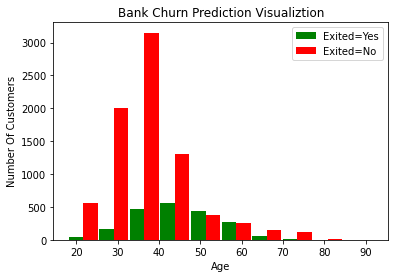

In [170]:
age_exit_no = df1[df1.Exited==0].Age
age_exit_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Bank Churn Prediction Visualiztion")

plt.hist([age_exit_yes, age_exit_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

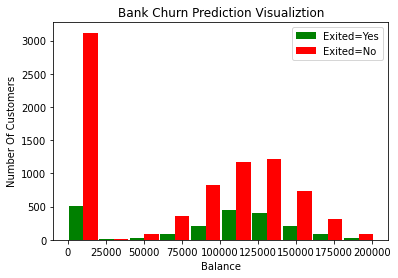

In [171]:
bl_exit_no = df1[df1.Exited==0].Balance
bl_exit_yes = df1[df1.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Bank Churn Prediction Visualiztion")

plt.hist([bl_exit_yes, bl_exit_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [172]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**One Hot Encoding**

In [173]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [174]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [175]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [176]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Data Scaling**

In [177]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [178]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.458 0.626 0.664 0.886
 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734 0.9
 0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856 0.328
 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642 0.678
 0.54  0.652 0.444 0.69  0.484 0.434 0.688

In [179]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.416935,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.794294,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.624402,0.000000,1,1,0.395400,0,0,0,1


**Handling Imbalanced Dataset**

In [180]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']
y.value_counts()

0    7950
1    2020
Name: Exited, dtype: int64

In [181]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7950
0    7950
Name: Exited, dtype: int64

**After Scaling and Balancing the Dataset**

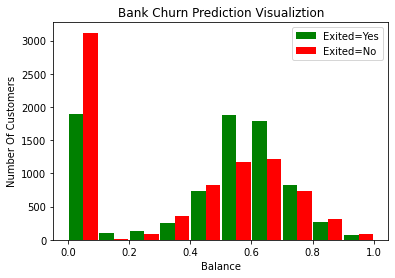

In [182]:
df3 = pd.concat([X_sm, y_sm], axis=1)
bl_exit_no = df3[df3.Exited==0].Balance
bl_exit_yes = df3[df3.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Bank Churn Prediction Visualiztion")

plt.hist([bl_exit_yes, bl_exit_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

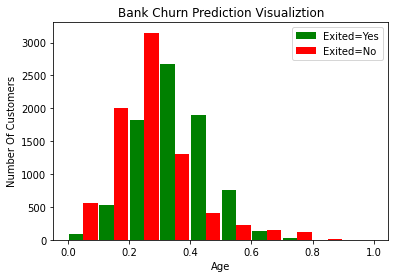

In [183]:
age_exit_no = df3[df3.Exited==0].Age
age_exit_yes = df3[df3.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Bank Churn Prediction Visualiztion")

plt.hist([age_exit_yes, age_exit_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

**Splitting data into training and testing**

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [185]:
X_train.shape

(12720, 12)

In [186]:
X_test.shape

(3180, 12)

In [187]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
8365,0.620000,1,0.405405,0.000000,0.447960,0.333333,0,1,0.938057,1,0,0
13345,0.461548,0,0.471299,0.743806,0.230504,0.000000,0,1,0.515422,0,0,1
11838,0.836109,1,0.293715,0.145500,0.614899,0.000000,0,0,0.849752,1,0,0
13153,0.221992,0,0.558090,0.759730,0.612761,0.000000,1,0,0.208303,0,1,0
12322,0.863387,1,0.200620,0.323070,0.608846,0.307700,0,1,0.266092,0,1,0
14490,0.519100,0,0.306070,0.229843,0.581990,0.000000,0,0,0.812747,0,1,0
11468,0.610109,0,0.425278,0.804072,0.619126,0.000000,1,1,0.089296,0,1,0
6616,0.260000,1,0.324324,0.100000,0.756980,0.333333,1,0,0.508885,1,0,0
13020,0.369837,1,0.336735,0.162895,0.687989,0.209649,1,1,0.803095,1,0,0
14538,0.576909,1,0.453409,0.006396,0.661489,0.000000,0,0,0.024884,0,1,0


In [188]:
len(X_train.columns)

12

**Building Models and Classification Report**

In [189]:
import tensorflow as tf
import seaborn as sn
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [196]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
    return y_preds

Epoch 1/100
398/398 [==============================] - 2s 3ms/step - loss: 0.6675 - accuracy: 0.6151
Epoch 2/100
398/398 [==============================] - 1s 3ms/step - loss: 0.6232 - accuracy: 0.6788
Epoch 3/100
398/398 [==============================] - 1s 3ms/step - loss: 0.5978 - accuracy: 0.6983
Epoch 4/100
398/398 [==============================] - 1s 3ms/step - loss: 0.5832 - accuracy: 0.7076
Epoch 5/100
398/398 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 0.7159
Epoch 6/100
398/398 [==============================] - 1s 3ms/step - loss: 0.5609 - accuracy: 0.7271
Epoch 7/100
398/398 [==============================] - 1s 3ms/step - loss: 0.5392 - accuracy: 0.7480
Epoch 8/100
398/398 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.7674
Epoch 9/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.7731
Epoch 10/100
398/398 [==============================] - 1s 3ms/step - loss: 0.4781 - accura

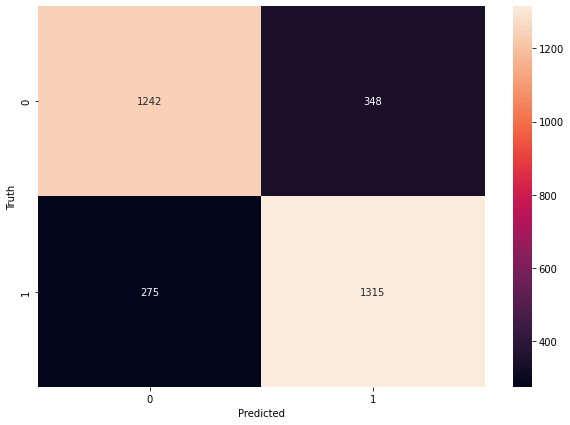

In [197]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)